In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from models.resnet import ResNet, BasicBlock
from utils import train, test, plot_stats, PlotOutput, get_device

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
device = get_device()
device

'cuda'

In [3]:
# augmentations
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# datasets
trainset = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)

testset = datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

# dataloaders
BATCH_SIZE = 128
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(
    testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


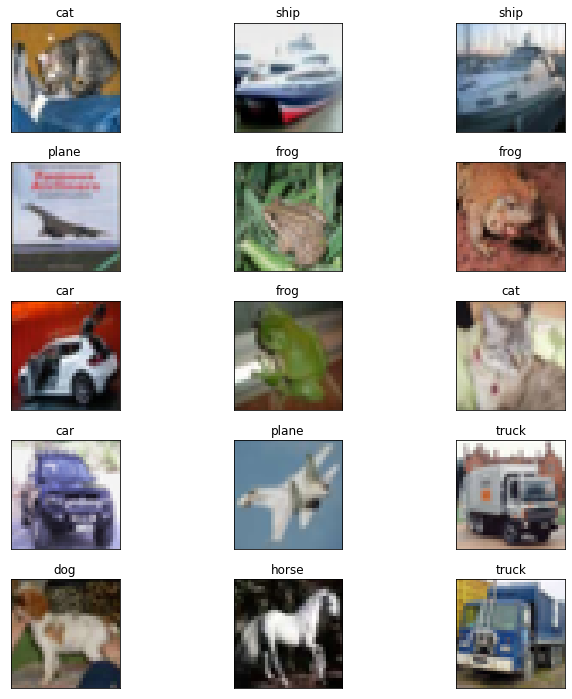

In [4]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(10, 10))
batch_data, batch_label = next(iter(test_loader))

t_std = torch.tensor(std).reshape(3, 1, 1)
t_mean = torch.tensor(mean).reshape(3, 1, 1)


for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.tight_layout()

    # get an image - [3, 32, 32]
    # and denormalize
    image = batch_data[i] * t_std + t_mean

    # Clip the input data to the valid range [0, 1]
    image = image.clip(0, 1)
    
    # [3, 32, 32] to [32, 32, 3]
    image = image.permute(1, 2, 0)
    plt.imshow(image)
    
    plt.title(classes[batch_label[i].item()])
    plt.xticks([])
    plt.yticks([])

In [5]:
"""
RF_out = RF_in + (kernel-1) * J_in
J_out = J_in * stride
"""

'\nRF_out = RF_in + (kernel-1) * J_in\nJ_out = J_in * stride\n'

In [6]:
class Cifar55k(ResNet):
    def __init__(self, nclass=10, dropout=0.1, logit_layer="pooling"):
        super(Cifar55k, self).__init__(block=BasicBlock, 
                                       num_channels=[8,8,16,16,32], 
                                       num_blocks=[2,2,2,2], 
                                       nclass=nclass, 
                                       dropout=dropout, 
                                       logit_layer=logit_layer)

model = Cifar55k(logit_layer="pooling").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
       BatchNorm2d-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             576
       BatchNorm2d-6            [-1, 8, 32, 32]              16
              ReLU-7            [-1, 8, 32, 32]               0
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             576
      BatchNorm2d-10            [-1, 8, 32, 32]              16
       BasicBlock-11            [-1, 8, 32, 32]               0
           Conv2d-12            [-1, 8, 32, 32]             576
      BatchNorm2d-13            [-1, 8, 32, 32]              16
             ReLU-14            [-1, 8,

In [7]:
criterion = F.cross_entropy
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [8]:
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, train_loader, optimizer, criterion)
    test_loss = test(model, device, test_loader, criterion)
    scheduler.step()

Epoch 1


Train: Loss=1.5376 Batch_id=390 Accuracy=34.54: 100%|██████████| 391/391 [00:14<00:00, 27.82it/s]


Test set: Average loss: 1.5580, Accuracy: 4287/10000 (42.87%)

Epoch 2


Train: Loss=1.1083 Batch_id=390 Accuracy=47.97: 100%|██████████| 391/391 [00:14<00:00, 27.63it/s]


Test set: Average loss: 1.4463, Accuracy: 4737/10000 (47.37%)

Epoch 3


Train: Loss=1.2441 Batch_id=390 Accuracy=54.95: 100%|██████████| 391/391 [00:14<00:00, 27.68it/s]


Test set: Average loss: 1.3065, Accuracy: 5415/10000 (54.15%)

Epoch 4


Train: Loss=0.7821 Batch_id=390 Accuracy=58.43: 100%|██████████| 391/391 [00:13<00:00, 28.01it/s]


Test set: Average loss: 1.0571, Accuracy: 6166/10000 (61.66%)

Epoch 5


Train: Loss=1.0890 Batch_id=390 Accuracy=61.01: 100%|██████████| 391/391 [00:14<00:00, 27.80it/s]


Test set: Average loss: 0.9832, Accuracy: 6449/10000 (64.49%)

Epoch 6


Train: Loss=1.0287 Batch_id=390 Accuracy=62.69: 100%|██████████| 391/391 [00:13<00:00, 27.96it/s]


Test set: Average loss: 0.9478, Accuracy: 6520/10000 (65.20%)

Epoch 7


Train: Loss=0.8522 Batch_id=390 Accuracy=64.20: 100%|██████████| 391/391 [00:14<00:00, 27.85it/s]


Test set: Average loss: 1.0027, Accuracy: 6461/10000 (64.61%)

Epoch 8


Train: Loss=0.9115 Batch_id=390 Accuracy=65.46: 100%|██████████| 391/391 [00:13<00:00, 29.03it/s]


Test set: Average loss: 0.9773, Accuracy: 6550/10000 (65.50%)

Epoch 9


Train: Loss=1.0135 Batch_id=390 Accuracy=66.73: 100%|██████████| 391/391 [00:13<00:00, 28.04it/s]


Test set: Average loss: 0.8788, Accuracy: 6852/10000 (68.52%)

Epoch 10


Train: Loss=0.8839 Batch_id=390 Accuracy=67.57: 100%|██████████| 391/391 [00:14<00:00, 27.63it/s]


Test set: Average loss: 0.8454, Accuracy: 6968/10000 (69.68%)

Epoch 11


Train: Loss=0.9671 Batch_id=390 Accuracy=68.79: 100%|██████████| 391/391 [00:13<00:00, 28.21it/s]


Test set: Average loss: 0.8236, Accuracy: 7034/10000 (70.34%)

Epoch 12


Train: Loss=0.6559 Batch_id=390 Accuracy=69.43: 100%|██████████| 391/391 [00:13<00:00, 28.51it/s]


Test set: Average loss: 0.8192, Accuracy: 7090/10000 (70.90%)

Epoch 13


Train: Loss=0.8382 Batch_id=390 Accuracy=70.29: 100%|██████████| 391/391 [00:14<00:00, 27.61it/s]


Test set: Average loss: 0.7919, Accuracy: 7191/10000 (71.91%)

Epoch 14


Train: Loss=0.7967 Batch_id=390 Accuracy=70.59: 100%|██████████| 391/391 [00:13<00:00, 28.02it/s]


Test set: Average loss: 0.8108, Accuracy: 7193/10000 (71.93%)

Epoch 15


Train: Loss=0.8855 Batch_id=390 Accuracy=71.39: 100%|██████████| 391/391 [00:14<00:00, 27.68it/s]


Test set: Average loss: 0.7559, Accuracy: 7356/10000 (73.56%)



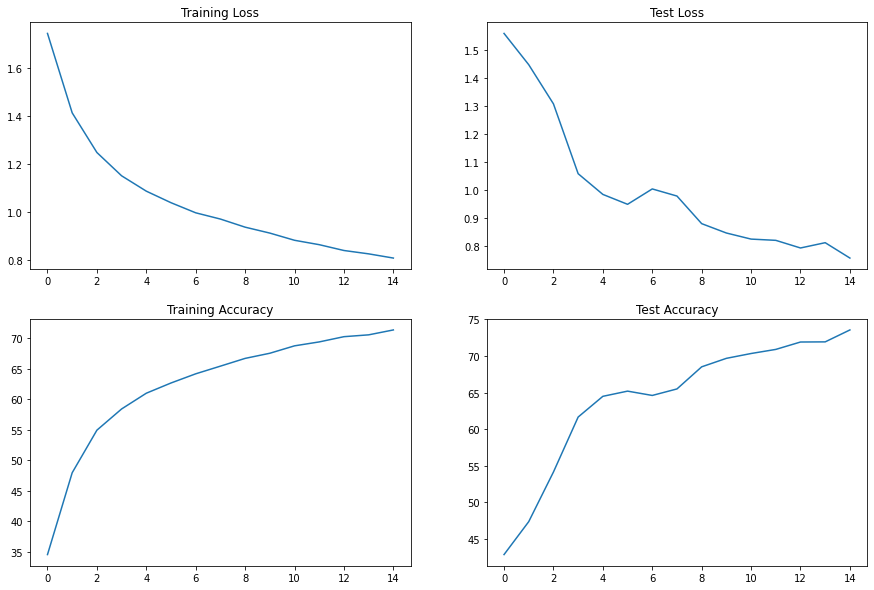

In [9]:
plot_stats()

100%|██████████| 79/79 [00:02<00:00, 38.07it/s]


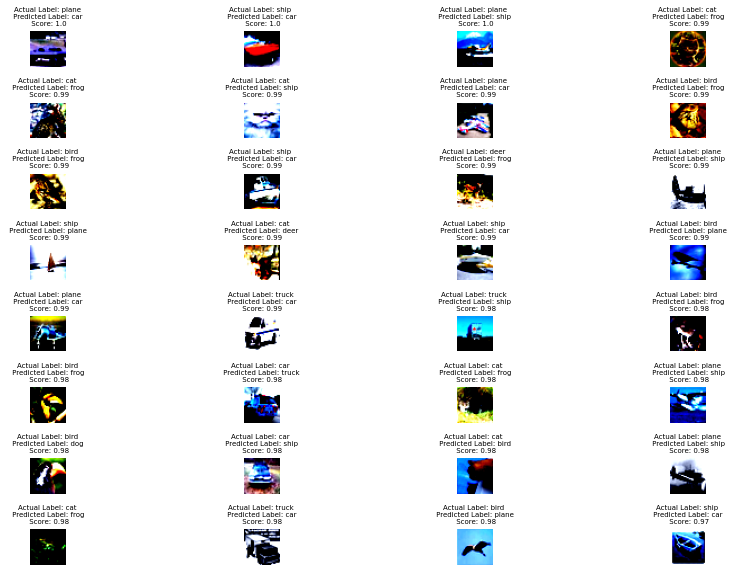

In [10]:
# plot incorrect plus very difficult classifications
p = PlotOutput(device)
p.run_prediction(model, test_loader, class_list=classes, ptype="incorrect")
p.plot(n=32, reverse=True)

100%|██████████| 79/79 [00:02<00:00, 35.84it/s]


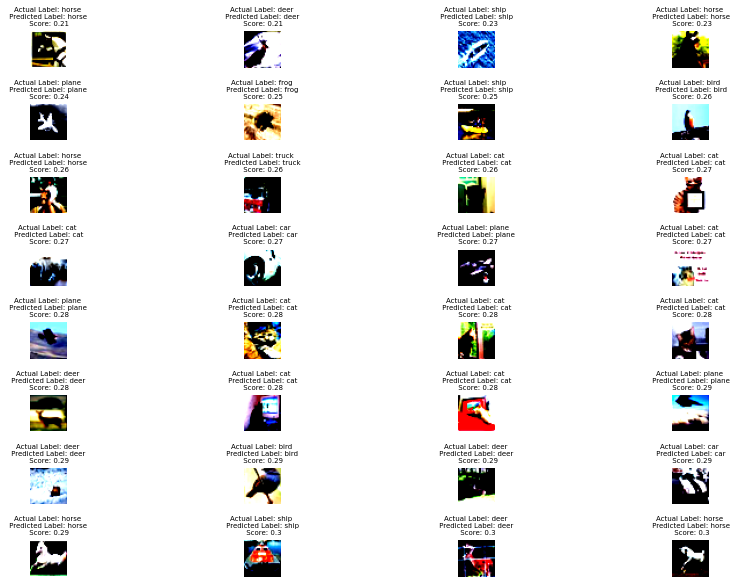

In [11]:
# plot correct yet difficult classifications
p.run_prediction(model, test_loader, class_list=classes, ptype="correct")
p.plot(n=32, reverse=False)